In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path=r"D:\Amjid_Ali\opencv\OpenCv\core operations on image\basic operations on images\messi.jpg"

In [3]:
img=cv2.imread(path)

In [4]:
#pyramid down

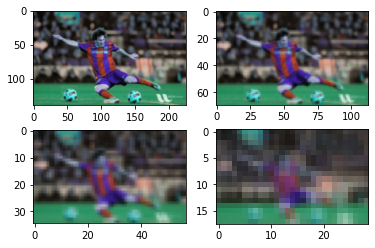

In [4]:
copy_image=img.copy()
for i in range(4):
    plt.subplot(2,2,i+1)
    copy_image=cv2.pyrDown(copy_image)
    plt.imshow(copy_image)
    cv2.imshow(f'{str(i)}',copy_image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

# gaussain pyramid

In [9]:
lower=img.copy()
gaussain_py=[lower]

for i in range(3):
    lower=cv2.pyrDown(lower)
    gaussain_py.append(lower)

In [11]:
a=0
for x in gaussain_py:
    a+=1
    cv2.imshow(f'{a-1}', x)
    cv2.waitKey(0)
cv2.destroyAllWindows()

# laplacain pyramid

In [12]:
laplacain_top=[gaussain_py[-1]]

In [18]:
for i in range(3,0,-1):
    size=(gaussain_py[i-1].shape[1],gaussain_py[i-1].shape[0])
    gaussain_expanded=cv2.pyrUp(gaussain_py[i],dstsize=size)
    laplacian=cv2.subtract(gaussain_py[i-1],gaussain_expanded)
    laplacain_top.append(laplacian)
    cv2.imshow("lap {}".format(i-1),laplacian)
    cv2.waitKey(0)
cv2.destroyAllWindows()

# image blending with pyramid

In [2]:
import cv2
import numpy as np

apple_path = './apple.jpeg'
orange_path = './orange.jpg'
apple = cv2.resize((cv2.imread(apple_path)),(512,512))
orange = cv2.imread(orange_path)
#printing the shape of our images
print(apple.shape)
print(orange.shape)

(512, 512, 3)
(512, 512, 3)


In [3]:
apple_orange = np.hstack((apple[:, :256], orange[:, 256:])) #Dividing them into right and left half as tuples using hstack

In [4]:
# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)

In [5]:
for x in gp_apple:print(x.shape)

(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
(8, 8, 3)


In [6]:
# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)

In [7]:
for x in gp_orange:print(x.shape)

(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
(8, 8, 3)


In [8]:
# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
    lp_apple.append(laplacian)

In [9]:
# for x in lp_apple:print(x.shape)
# for x in gp_apple:print(x.shape)

In [10]:
# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
    lp_orange.append(laplacian)


In [11]:
# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)

In [12]:
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
# for i in range(1, 6):
#     apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
#     apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

In [23]:
add_imcv2.add(apple_orange_pyramid[0][:,:,::-1],apple_orange_reconstruct[:,:,::-1])

array([[[224, 236, 146],
        [222, 236, 146],
        [250, 255, 156],
        [255, 255, 160],
        [255, 255, 164],
        [255, 255, 172],
        [255, 255, 162],
        [255, 255, 162],
        [255, 255, 210],
        [255, 255, 212],
        [255, 255, 220],
        [255, 255, 232],
        [255, 255, 240],
        [255, 255, 250],
        [255, 255, 255],
        [255, 255, 248]],

       [[220, 234, 138],
        [222, 236, 140],
        [252, 255, 148],
        [255, 255, 158],
        [255, 255, 160],
        [255, 255, 164],
        [255, 255, 160],
        [255, 255, 152],
        [255, 255, 196],
        [255, 255, 198],
        [255, 255, 206],
        [255, 255, 218],
        [255, 255, 226],
        [255, 255, 232],
        [255, 255, 234],
        [255, 255, 224]],

       [[216, 232, 136],
        [226, 244, 138],
        [255, 255, 144],
        [255, 255, 144],
        [255, 250, 134],
        [255, 236, 132],
        [255, 224, 132],
        [254, 212, 12

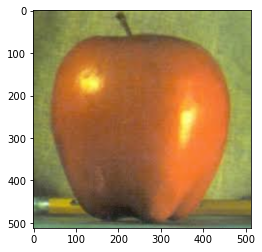

In [173]:
plt.imshow( apple[:, :, ::-1 ])


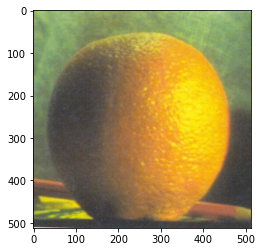

In [174]:
plt.imshow( orange[:, :, ::-1 ])

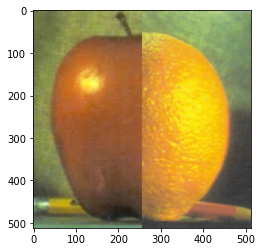

In [175]:
plt.imshow( apple_orange[:, :, ::-1 ])

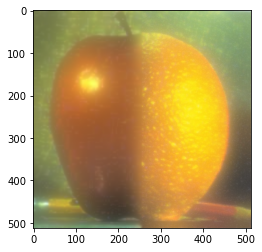

In [176]:
plt.imshow( apple_orange_reconstruct[:, :, ::-1 ])